# General Social Survey
### Happiness exploration

This notebook look at the [General Social Survey](https://gss.norc.org/) (GSS), exploring themes of "happiness." The primary data file for this exploration (gss7221_rj2.dta) can be found in the [GSS Strata archive](https://gss.norc.org/documents/stata/GSS_stata.zip). If you want to work with this data for your own analysis, you can lookup metadata and labels for the variables in the [codebooks](https://gss.norc.org/Get-Documentation).

Special thanks to [Allen Downey](https://github.com/AllenDowney) for all the work they have published on crafting jupyter notebooks with GSS data.

This notebook is part of the [GeneralSocialSurvey](https://github.com/CulleyHarrelson/GeneralSocialSurvey) github repository.

[Seaborn](https://seaborn.pydata.org/index.html) is the plotting library used to generate these visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#import convenience function, column selection and data clensing functions
import gss_functions


In [2]:
# load the data
# extract this file from: https://gss.norc.org/documents/stata/GSS_stata.zip
gss = pd.read_stata('gss7221_r2.dta', columns=gss_functions.columns(), convert_categoricals=False)
gss_functions.gss_replace_invalid(gss)


In [3]:
    # some columns have no missing values
    clean_columns = ["id", "year", "ballot", "sex", "race", "reg16", "region", "srcbelt"]

    for column in gss.columns:
        if gss[column].dtype == int and column not in clean_columns:
            print(f"'{column}', ", end="")
    print()

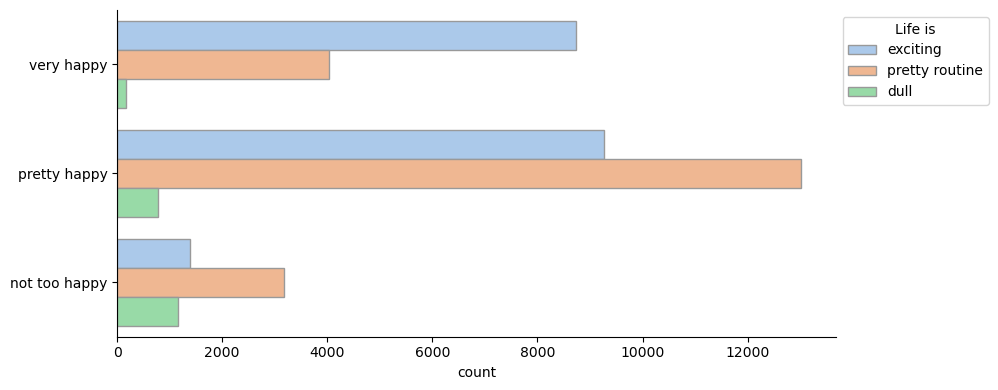

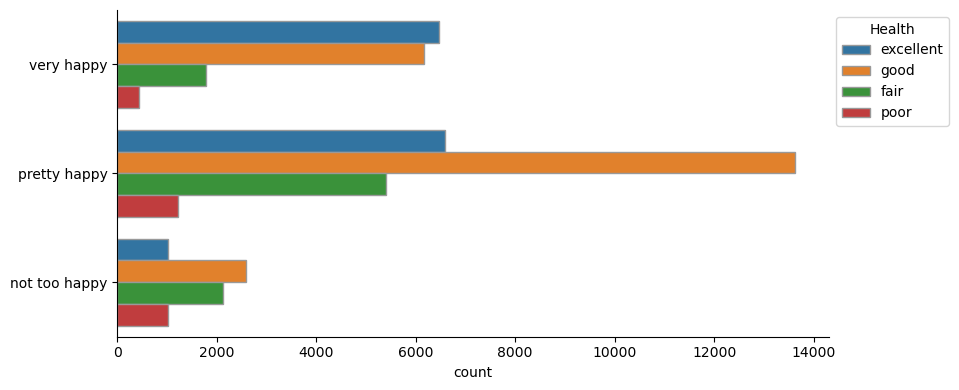

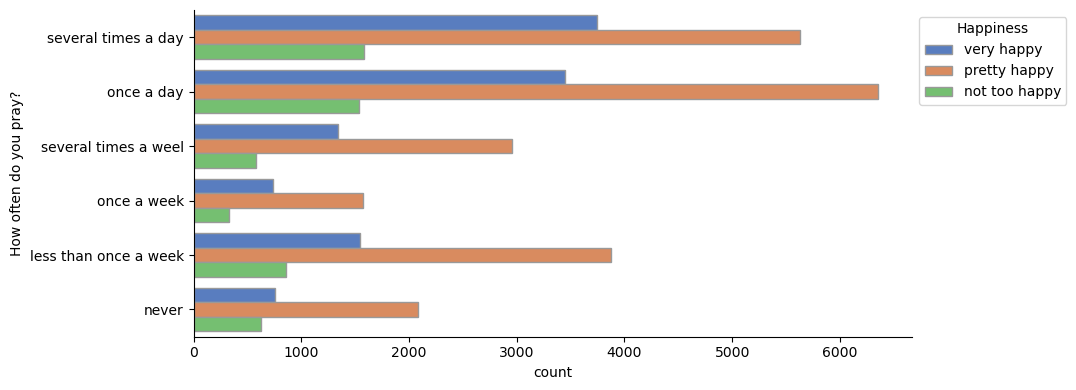

In [13]:
# happy x life
i = sns.catplot(
    data=gss, y="happy", hue="life", kind="count",
    palette="pastel", edgecolor=".6",legend=False, height=4, aspect=2
)

i.set_yticklabels(['very happy', 'pretty happy', 'not too happy'])
i.set_ylabels('')
plt.legend(title='Life is', labels=['exciting', 'pretty routine', 'dull'], loc = 2, bbox_to_anchor = (1,1))
plt.draw()

# happy x health
i = sns.catplot(
    data=gss, y="happy", hue="health", kind="count",
    palette="tab10", edgecolor=".6",legend=False, height=4, aspect=2
)

i.set_yticklabels(['very happy', 'pretty happy', 'not too happy'])
i.set_ylabels('')
plt.legend(title='Health', labels=['excellent', 'good', 'fair', 'poor'], loc = 2, bbox_to_anchor = (1,1))
plt.draw()

# pray x happy
i = sns.catplot(
    data=gss, y="pray", hue="happy", kind="count",
    palette="muted", edgecolor=".6",legend=False, height=4, aspect=2
)

pray = ['several times a day', 'once a day', 'several times a weel', 'once a week', 'less than once a week', 'never']

i.set_yticklabels(pray)
i.set_ylabels('How often do you pray?')
plt.legend(title='Happiness', labels=['very happy', 'pretty happy', 'not too happy'], loc = 2, bbox_to_anchor = (1,1))
plt.draw()


# Plotly Exploration

The first plot in this output is a histogram aproxomating the first plot in the previous output. 

[plotly color palettes](https://plotly.com/python/discrete-color/#color-sequences-in-plotly-express)


In [63]:
import plotly.express as px

fig = px.histogram(
    gss, 
    x='happy', 
    y='age', 
    color='life', 
    histfunc='count', 
    labels={"happy": "Happiness", "life": "Satisfaction"},
    color_discrete_sequence=px.colors.qualitative.Pastel,
)

# update legend labels
newnames = {'1.0':'exciting', '2.0': 'routine', '3.0': 'dull'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

# update x-axis labels
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1,2,3],
        ticktext = ['very happy', 'pretty happy', 'not too happy']
    )
)

fig.show()